In [2]:
import pandas as pd
import numpy as np
import glob
import cv2

In [3]:
files = glob.glob("data/*.csv")


In [4]:
df = pd.DataFrame() #creating dataframe 
for f in files: #reading files
    cdf = pd.read_csv(f) 
    df = df.append(cdf)#appending each f in file  into df

In [5]:
df.head()


,created_at,loc,sentiment,subjectivity,text,user_id,verified
0,2020-03-05 20:37:08+00:00,WA,0.0,0.0,donalhassett looking ward corona virus while a...,u1,0
1,2020-03-05 20:37:09+00:00,MI,0.0,0.0,atrupar this clip trump denies whos coronaviru...,u2,0
2,2020-03-05 20:37:09+00:00,IN,0.0,0.0,_katelynhall stop corona 2020 kony platform,u3,0
3,2020-03-05 20:37:11+00:00,AL,0.2,0.5,employee amazon been confirmed have corona vir...,u4,0
4,2020-03-05 20:37:11+00:00,HI,0.0,0.0,stayfrea alert corona virus spread through mon...,u5,0


In [6]:
df.shape


(94783, 7)

In [7]:
#converting it into csv 
df.to_csv('coronavirus.csv', index=False)


In [8]:
x=pd.read_csv("coronavirus.csv")

In [9]:
x["loc"]

0        WA
1        MI
2        IN
3        AL
4        HI
         ..
94778    NJ
94779    SD
94780    CA
94781    NY
94782    IL
Name: loc, Length: 94783, dtype: object

In [10]:
x["text"]

0        donalhassett looking ward corona virus while a...
1        atrupar this clip trump denies whos coronaviru...
2              _katelynhall stop corona 2020 kony platform
3        employee amazon been confirmed have corona vir...
4        stayfrea alert corona virus spread through mon...
                               ...                        
94778    people need stop with this corona virus nonsen...
94779    lopezlovinlife corona crisis australia fights ...
94780    tony 19542 those that older over deaths from c...
94781    dazhaneleah enjoying cheap holiday beach alone...
94782    groth 1945 action realdonaldtrump needed contr...
Name: text, Length: 94783, dtype: object

In [11]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [12]:
loc=x.groupby("loc")

In [13]:
""" 'AL' => 'Alabama',
  'AK' => 'Alaska',
  'AS' => 'America Samoa',
  'AZ' => 'Arizona',
  'AR' => 'Arkansas',
  'CA' => 'California',
  'CO' => 'Colorado',
  'CT' => 'Connecticut',
  'DE' => 'Delaware',
  'DC' => 'District of Columbia',
  'FM' => 'Micronesia1',
  'FL' => 'Florida',
  'GA' => 'Georgia',
  'GU' => 'Guam',
  'HI' => 'Hawaii',
  'ID' => 'Idaho',
  'IL' => 'Illinois',
  'IN' => 'Indiana',
  'IA' => 'Iowa',
  'KS' => 'Kansas',
  'KY' => 'Kentucky',
  'LA' => 'Louisiana',
  'ME' => 'Maine',
  'MH' => 'Islands1',
  'MD' => 'Maryland',
  'MA' => 'Massachusetts',
  'MI' => 'Michigan',
  'MN' => 'Minnesota',
  'MS' => 'Mississippi',
  'MO' => 'Missouri',
  'MT' => 'Montana',
  'NE' => 'Nebraska',
  'NV' => 'Nevada',
  'NH' => 'New Hampshire',
  'NJ' => 'New Jersey',
  'NM' => 'New Mexico',
  'NY' => 'New York',
  'NC' => 'North Carolina',
  'ND' => 'North Dakota',
  'OH' => 'Ohio',
  'OK' => 'Oklahoma',
  'OR' => 'Oregon',
  'PW' => 'Palau',
  'PA' => 'Pennsylvania',
  'PR' => 'Puerto Rico',
  'RI' => 'Rhode Island',
  'SC' => 'South Carolina',
  'SD' => 'South Dakota',
  'TN' => 'Tennessee',
  'TX' => 'Texas',
  'UT' => 'Utah',
  'VT' => 'Vermont',
  'VI' => 'Virgin Island',
  'VA' => 'Virginia',
  'WA' => 'Washington',
  'WV' => 'West Virginia',
  'WI' => 'Wisconsin',
  'WY' => 'Wyoming'"""

" 'AL' => 'Alabama',\n  'AK' => 'Alaska',\n  'AS' => 'America Samoa',\n  'AZ' => 'Arizona',\n  'AR' => 'Arkansas',\n  'CA' => 'California',\n  'CO' => 'Colorado',\n  'CT' => 'Connecticut',\n  'DE' => 'Delaware',\n  'DC' => 'District of Columbia',\n  'FM' => 'Micronesia1',\n  'FL' => 'Florida',\n  'GA' => 'Georgia',\n  'GU' => 'Guam',\n  'HI' => 'Hawaii',\n  'ID' => 'Idaho',\n  'IL' => 'Illinois',\n  'IN' => 'Indiana',\n  'IA' => 'Iowa',\n  'KS' => 'Kansas',\n  'KY' => 'Kentucky',\n  'LA' => 'Louisiana',\n  'ME' => 'Maine',\n  'MH' => 'Islands1',\n  'MD' => 'Maryland',\n  'MA' => 'Massachusetts',\n  'MI' => 'Michigan',\n  'MN' => 'Minnesota',\n  'MS' => 'Mississippi',\n  'MO' => 'Missouri',\n  'MT' => 'Montana',\n  'NE' => 'Nebraska',\n  'NV' => 'Nevada',\n  'NH' => 'New Hampshire',\n  'NJ' => 'New Jersey',\n  'NM' => 'New Mexico',\n  'NY' => 'New York',\n  'NC' => 'North Carolina',\n  'ND' => 'North Dakota',\n  'OH' => 'Ohio',\n  'OK' => 'Oklahoma',\n  'OR' => 'Oregon',\n  'PW' => 'Pal

In [14]:
loc.describe()


sentiment                                                                 \
        count      mean       std     min       25%  50%       75%       max   
loc                                                                            
AK      369.0  0.032339  0.258980 -1.0000  0.000000  0.0  0.136364  0.900000   
AL     1348.0  0.006987  0.253269 -1.0000  0.000000  0.0  0.000000  1.000000   
AR      421.0  0.002497  0.235066 -1.0000  0.000000  0.0  0.000000  1.000000   
AZ     2281.0  0.004641  0.251210 -1.0000  0.000000  0.0  0.008333  1.000000   
CA    14473.0  0.015411  0.251135 -1.0000  0.000000  0.0  0.000000  1.000000   
CO     1834.0  0.012364  0.265109 -1.0000 -0.025000  0.0  0.036458  1.000000   
CT      779.0  0.019646  0.238589 -1.0000  0.000000  0.0  0.000000  1.000000   
DE      375.0  0.004159  0.231351 -1.0000  0.000000  0.0  0.000000  0.841797   
FL     6051.0  0.014459  0.236352 -1.0000  0.000000  0.0  0.000000  1.000000   
GA     3202.0  0.016595  0.226826 -1.0000  0.000000  0.0  0.000000  1.000000   
HI      560.0  0.009028  0.254553 -1.0000 -0.033333  0.0  0.000000  1.000000   
IA      448.0  0.007008  0.236970 -1.0000  0.000000  0.0  0.021733  1.000000   
ID      342.0  0.025715  0.274611 -1.0000  0.000000  0.0  0.100000  1.000000   
IL     3915.0  0.021084  0.258998 -1.0000  0.000000  0.0  0.020833  1.000000   
IN     1223.0  0.021143  0.248135 -1.0000  0.000000  0.0  0.050000  1.000000   
KS      455.0  0.035723  0.234157 -0.8000  0.000000  0.0  0.069444  1.000000   
KY     1002.0  0.022548  0.237647 -1.0000  0.000000  0.0  0.083333  1.000000   
LA     1340.0  0.006018  0.219147 -1.0000  0.000000  0.0  0.000000  1.000000   
MA     2240.0  0.009443  0.252584 -1.0000  0.000000  0.0  0.030682  1.000000   
MD     1968.0  0.021864  0.251255 -1.0000  0.000000  0.0  0.000000  1.000000   
ME      312.0  0.048434  0.291317 -0.8750  0.000000  0.0  0.066667  1.000000   
MI     1872.0  0.022925  0.246925 -1.0000  0.000000  0.0  0.020833  1.000000   
MN     1024.0  0.032294  0.250137 -1.0000  0.000000  0.0  0.116477  1.000000   
MO      864.0  0.019200  0.255122 -1.0000  0.000000  0.0  0.021181  1.000000   
MS      360.0  0.020156  0.231068 -1.0000  0.000000  0.0  0.000000  1.000000   
MT      242.0  0.021354  0.249434 -1.0000  0.000000  0.0  0.067803  1.000000   
NC     1941.0 -0.000165  0.247211 -1.0000  0.000000  0.0  0.000000  1.000000   
ND      115.0  0.041248  0.266181 -0.9375  0.000000  0.0  0.000000  1.000000   
NE      585.0  0.025546  0.262124 -1.0000  0.000000  0.0  0.066667  1.000000   
NH     1410.0  0.017877  0.254741 -1.0000  0.000000  0.0  0.061215  1.000000   
NJ     2149.0  0.014872  0.239783 -1.0000  0.000000  0.0  0.000000  1.000000   
NM      635.0  0.017722  0.225985 -1.0000  0.000000  0.0  0.000000  1.000000   
NV     2232.0  0.015540  0.250142 -1.0000  0.000000  0.0  0.000000  1.000000   
NY     5980.0  0.012756  0.249514 -1.0000  0.000000  0.0  0.000000  1.000000   
OH     2446.0  0.014758  0.247606 -1.0000  0.000000  0.0  0.016667  1.000000   
OK      873.0  0.015521  0.235878 -1.0000  0.000000  0.0  0.000000  1.000000   
OR     1852.0  0.013998  0.248215 -1.0000  0.000000  0.0  0.064375  1.000000   
PA     2792.0  0.017446  0.246641 -1.0000  0.000000  0.0  0.000000  1.000000   
PR        1.0  0.500000       NaN  0.5000  0.500000  0.5  0.500000  0.500000   
RI      256.0 -0.007083  0.237616 -0.9000  0.000000  0.0  0.000000  0.875000   
SC     1310.0  0.001959  0.251720 -1.0000  0.000000  0.0  0.000000  1.000000   
SD      218.0  0.017014  0.305290 -1.0000 -0.037500  0.0  0.135606  1.000000   
TN     1560.0  0.025509  0.248200 -1.0000  0.000000  0.0  0.030682  1.000000   
TX    10614.0  0.007397  0.239303 -1.0000  0.000000  0.0  0.000000  1.000000   
UT      535.0  0.023676  0.247065 -0.8000  0.000000  0.0  0.050000  1.000000   
VA     1596.0  0.000433  0.240001 -1.0000 -0.025000  0.0  0.000000  1.000000   
VT      654.0  0.009666  0.244452 -0.8000  0.000000  0.0  0.020170  1.000000   
WA  

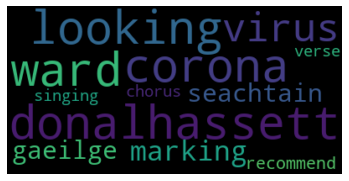

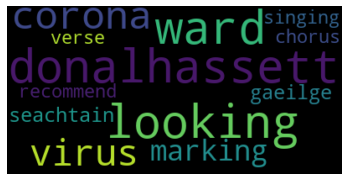

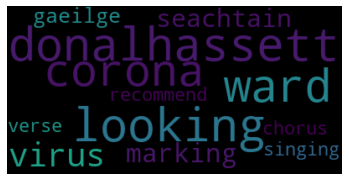

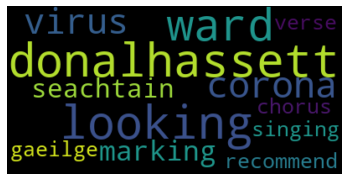

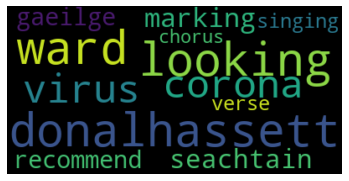

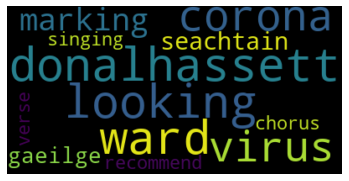

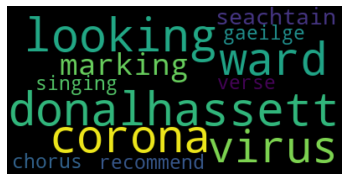

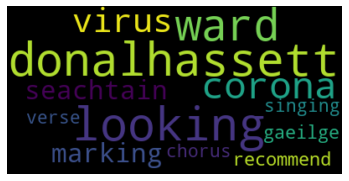

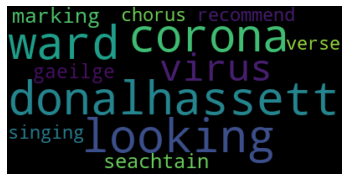

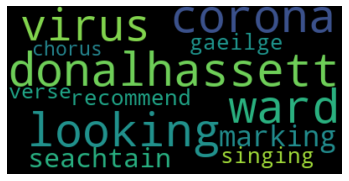

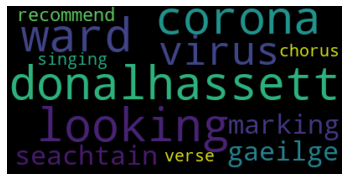

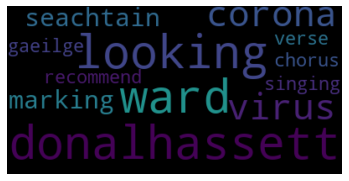

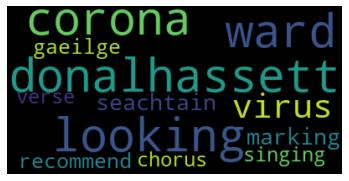

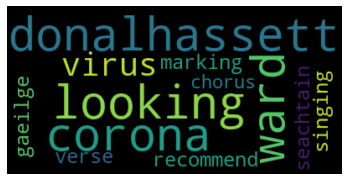

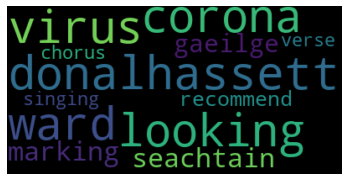

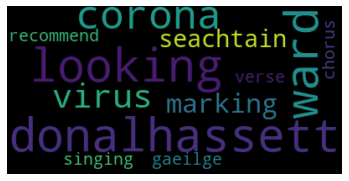

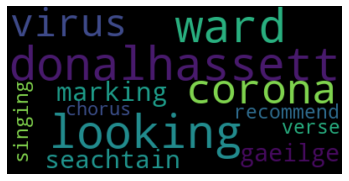

KeyboardInterrupt: 

In [15]:

for t in x["text"]:
    # Start with one review:
    text = x.text[0]

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [16]:
x["text"][0]

'donalhassett looking ward corona virus while also marking seachtain gaeilge recommend singing verse chorus'

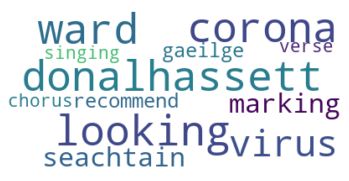

In [17]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df = pd.read_csv("coronavirus.csv")
  
comment_words = '' 
stopwords = set(STOPWORDS)


for t in df.text:
    t = str(t) 
  
    tokens = t.split() #dividing it into tokens
    
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() #lowercase of tokens
      
    comment_words += " ".join(tokens)+" " #making comment word 
    
    
# generating wordcloud    

twitter_mask = cv2.imread('twitter_mask.png')
wordcloud = WordCloud(width = 1800, height = 1400,background_color ='white',stopwords = stopwords, mask = twitter_mask, max_font_size=50,min_font_size = 10).generate(comment_words)
  
# plotting it                       
plt.figure(figsize = (10, 10), edgecolor='r')
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) #adjust subplot parameters to give specified padding.
  
plt.show() 

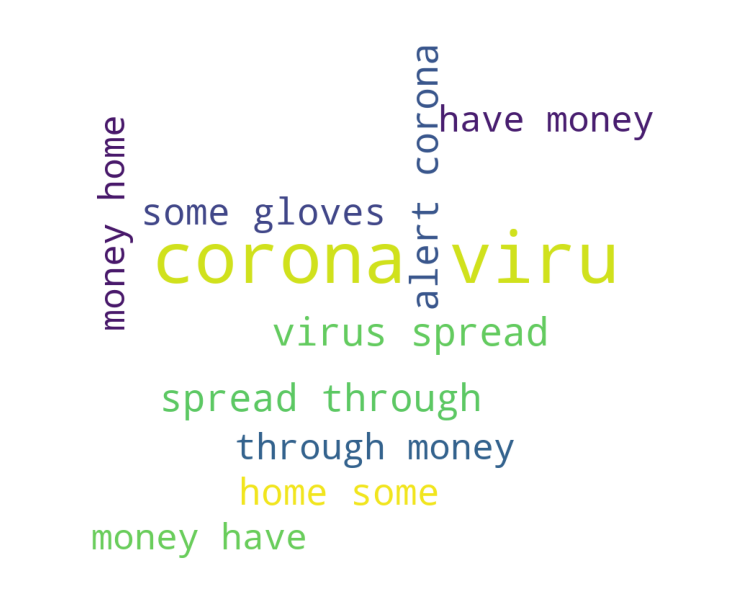

In [21]:
df = pd.read_csv("coronavirus.csv")
  
comment_words = '' 
stopwords = set(STOPWORDS)


for t in df.text:
    t = str(t) 
  
    tokens = t.split() #dividing it into tokens
    
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() #lowercase of tokens
      
    comment_words += " ".join(tokens)+" " #making comment word 
    
    
# generating wordcloud    

twitter_mask = cv2.imread('twitter_mask.png')
wordcloud = WordCloud(width = 1800, height = 1400,background_color ='white',stopwords = stopwords, mask = twitter_mask, max_font_size=100,min_font_size = 50).generate(comment_words)
  
# plotting it                       
plt.figure(figsize = (10, 10), edgecolor='r')
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) #adjust subplot parameters to give specified padding.
  
plt.show() 

In [ ]:
df = pd.read_csv("coronavirus.csv")
  
comment_words = '' 
stopwords = set(STOPWORDS)


for t in df.text:
    t = str(t) 
  
    tokens = t.split() #dividing it into tokens
    
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() #lowercase of tokens
      
    comment_words += " ".join(tokens)+" " #making comment word 
    
    
# generating wordcloud    

twitter_mask = cv2.imread('twitter_mask.png')
wordcloud = WordCloud(width = 1800, height = 1400,background_color ='white',stopwords = stopwords, mask = twitter_mask, max_font_size=100,min_font_size = 50).generate(comment_words)
  
# plotting it                       
plt.figure(figsize = (10, 10), edgecolor='r')
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) #adjust subplot parameters to give specified padding.
  
plt.show() 